# What factors motivate users’ participation at CareerVillage? 
 ~ Saurabh Vijay

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saurabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [402]:
# Reading files
ans = pd.read_csv('clean/answers.csv')
com = pd.read_csv('clean/comments.csv')
pro = pd.read_csv('clean/professionals.csv')
que = pd.read_csv('clean/questions.csv')
stu = pd.read_csv('clean/students.csv')

In [318]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

In [370]:
#merging students with questions and professionals with answers
stu_que = stu.merge(que, left_on='students_id', right_on='questions_author_id', how='left')
pro_ans = pro.merge(ans, left_on='professionals_id', right_on='answers_author_id', how='left')

# Data Preprocessing

In [452]:
# Checking percentage of empty values for professionals dataset
pro.isnull().sum() / pro.shape[0] * 100

professionals_id             0.0
professionals_location       0.0
professionals_industry       0.0
professionals_headline       0.0
professionals_date_joined    0.0
all_tags                     0.0
tag_count                    0.0
group_count                  0.0
school_count                 0.0
mean_immediate_emails        0.0
mean_immediate_questions     0.0
mean_daily_emails            0.0
mean_daily_questions         0.0
mean_weekly_emails           0.0
mean_weekly_questions        0.0
total_questions_answered     0.0
total_answers_posted         0.0
total_comment_count          0.0
cluster                      0.0
Pro_industry_category        0.0
company                      0.0
dtype: float64

In [404]:
#Dropping mostly empty columns
pro = pro.drop(columns=['Unnamed: 0','all_groups', 'all_schools','first_answer_posted','last_answer_posted','first_comment_posted','last_comment_posted'])

In [405]:
pro = pro.dropna(subset=['professionals_industry','all_tags','professionals_location','professionals_headline'])

In [406]:
que = que.dropna(subset=['questions_id','all_tags'])

# Similarity of tags

In [433]:
# vectorization for cluster analysis
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(que.all_tags)

In [434]:
# K-means clustering
from sklearn.cluster import KMeans
# initialize kmeans with 7 centroids
kmeans = KMeans(n_clusters=15, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
# Adding columns for clusters
que['cluster']=clusters

In [437]:
que['tags_category'] = np.nan

In [393]:
que.all_tags[que.cluster==3].unique()

array(['career | medicine | technology | future',
       'help | college | career-path | worried | stressed',
       'career | artist | career-counseling | music | art', ...,
       'career | medicine | career-counseling | career-change | career-choice | travel | career-path | job-search-strategies',
       'career | job | majors | traveling',
       'career | career-counseling | doctor | college | hospital-and-health-care | educator'],
      dtype=object)

In [438]:
# Function for nameing
def tags_category(cluster,name):
    for i in que.index:
        if que.cluster[i]==cluster:
            que.tags_category[i] = name

In [439]:
# naming tags
tags_category(0,'Professional Career')
tags_category(1,'Nursing and Medicine')
tags_category(2,'Teaching')
tags_category(3,'Career Counseling')
tags_category(4,'Social Work')
tags_category(5,'Business')
tags_category(6,'school')
tags_category(7,'Engineering')
tags_category(8,'Scientist')
tags_category(9,'Law enforcement')
tags_category(10,'Psychology')
tags_category(11,'Technology')
tags_category(12,'College')
tags_category(13,'Professional')
tags_category(14,'College')
              

/var/folders/d8/cjfsrx0d5495rs3b7w9l895h0000gn/T/ipykernel_17681/2313607985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  que.tags_category[i] = name
/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB o

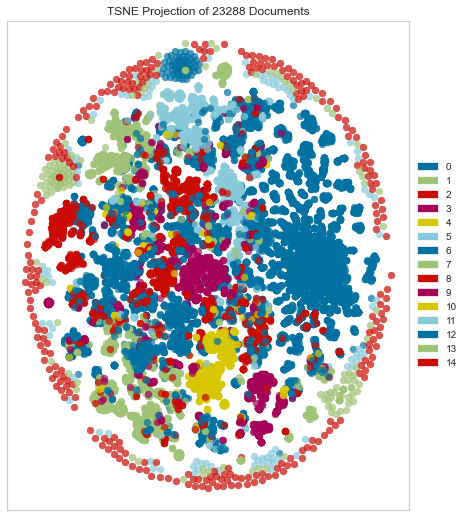

In [435]:
#Visualizing clusters in multiple dimensions
from yellowbrick.text import TSNEVisualizer


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz = TSNEVisualizer(ax=ax,
                          decompose="svd",
                          decompose_by=50,
                          random_state=123)

tsne_viz.fit(X.toarray(), clusters)

tsne_viz.show();

In [440]:
pd.DataFrame(que['tags_category'].unique())

,0
0,Professional Career
1,Business
2,Nursing and Medicine
3,Engineering
4,Law enforcement
5,Psychology
6,Career Counseling
7,College
8,Teaching
9,Scientist


In [397]:
que = que.drop(columns = ['Tags_category','Unnamed: 0'])

In [399]:
que.to_csv('questions_TagCategory.csv')

# Checking Similarity of Industries

In [408]:
# vectorization for cluster analysis
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(pro.professionals_industry)

In [409]:
# K-means clustering
from sklearn.cluster import KMeans
# initialize kmeans with 7 centroids
kmeans = KMeans(n_clusters=20, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_
# Adding columns for clusters
pro['cluster']=clusters

In [410]:
#Checking unique cluster values
pro.professionals_industry[pro.cluster==19].unique()
pro['Pro_industry_category'] = np.nan

In [411]:
pro.professionals_industry[pro.cluster==10].unique()

array(['Internet', 'Internet Marketing', 'Internet, TV, Advertising',
       'Internet/Media', 'INTERNET', 'Internet, en',
       'Internet, Marketing, Technology',
       'Internet, Technology, Engineering', 'Global Internet Security',
       'Internet and Entrepreneurship ', 'Internet ',
       'Internet of Things', 'Internet - Tech', 'Internet Technology',
       'Internet and Non-Profit', 'Technology, Internet',
       'Internet and Entertainment Field Services',
       'Hospitality / Internet',
       'Internet & Entertainment, Communications'], dtype=object)

In [412]:
# Function for nameing
def name_subcategory(cluster,name):
    for i in pro.index:
        if pro.cluster[i]==cluster:
            pro.Pro_industry_category[i] = name
        

In [413]:
# naming clusters
name_subcategory(0,'Multidisciplinary')
name_subcategory(1,'Information Technology')
name_subcategory(2,'Computer Software and hardware')
name_subcategory(3,'Multidisciplinary')
name_subcategory(4,'Accounting')
name_subcategory(5,'Human Resources')
name_subcategory(6,'Financial services')
name_subcategory(7,'Marketing and Advertising')
name_subcategory(8,'Healthcare')
name_subcategory(9,'Consulting')
name_subcategory(10,'Internet')
name_subcategory(11,'Higher Education')
name_subcategory(12,'Legal services')
name_subcategory(13,'Engineering')
name_subcategory(14,'Aviation')
name_subcategory(15,'Designing')
name_subcategory(16,'Pharmaceuticals')
name_subcategory(17,'Research')
name_subcategory(18,'Telecommunications')
name_subcategory(19,'Biotechnology')

/var/folders/d8/cjfsrx0d5495rs3b7w9l895h0000gn/T/ipykernel_17681/3700006729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro.Pro_industry_category[i] = name
/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/saurabh/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB o

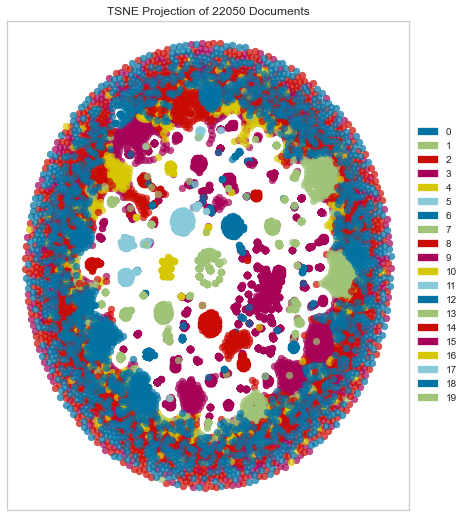

In [429]:
#Visualizing clusters in multiple dimensions
from yellowbrick.text import TSNEVisualizer


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

tsne_viz = TSNEVisualizer(ax=ax,
                          decompose="svd",
                          decompose_by=50,
                          random_state=123)

tsne_viz.fit(X.toarray(), clusters)

tsne_viz.show();


In [415]:
pro.to_csv('professionals_IndustryCategory.csv')

# Exploratory Analysis

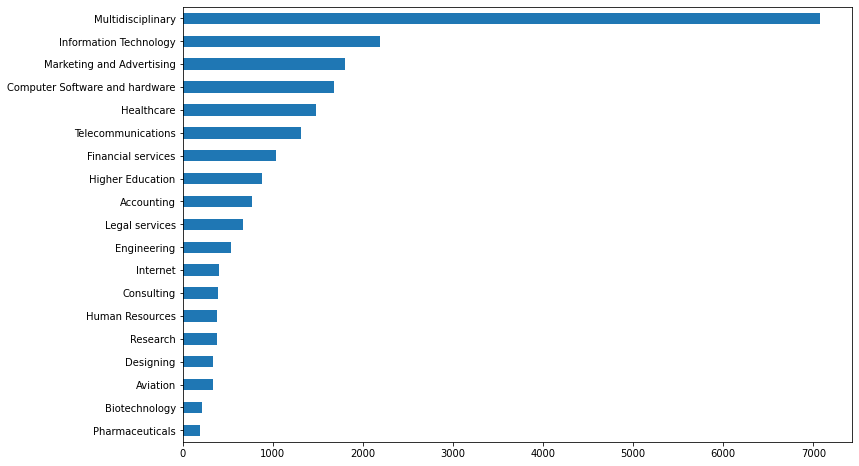

In [417]:
# Plotting industry category
plt.figure(figsize=(12, 8))
pro.Pro_industry_category.value_counts()[::-1].plot(kind='barh')
plt.show()

In [419]:
# Function to find companies
def find_company(headline):
    ''' This Function finds company at which Professionals work '''
    value = ''
    if ' at ' in str(headline):
        value = headline.split(' at ')[1]
    else:
        value = str(headline)
    return value

pro['company'] = pro.professionals_headline.apply(lambda x:find_company(x))


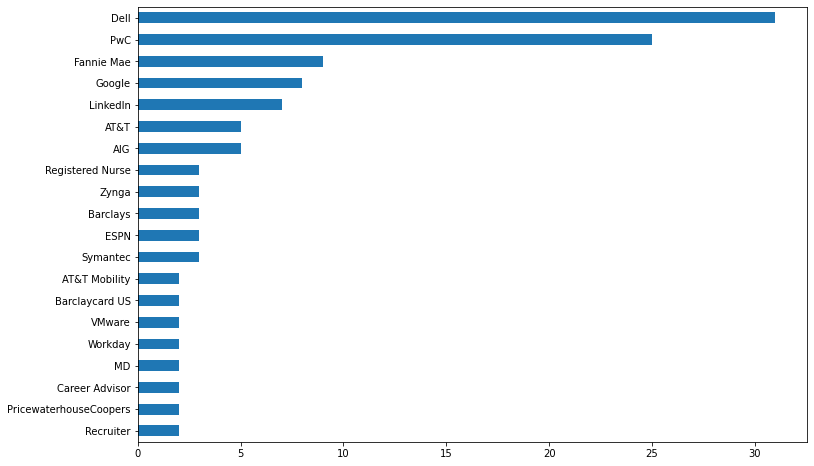

In [421]:
# Plotting companies
plt.figure(figsize=(12, 8))
pro[(pro.total_questions_answered>10)&(pro.company!='--')].company.value_counts()[:20][::-1].plot(kind='barh')
plt.show()

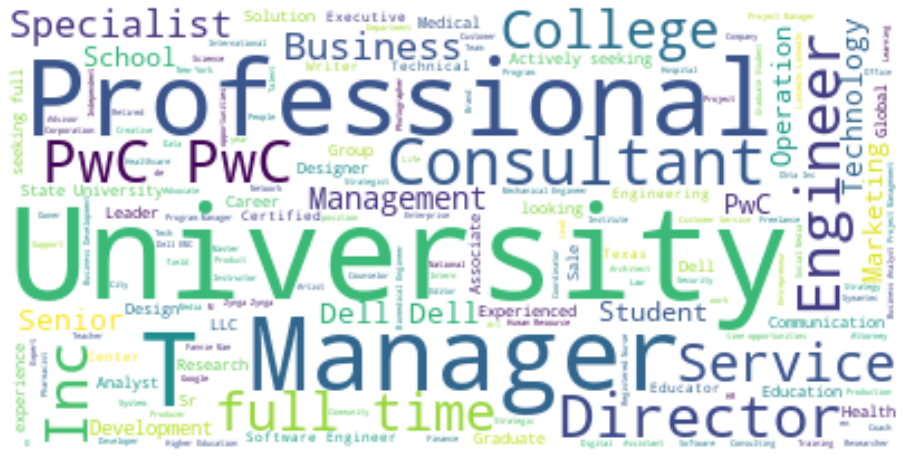

In [315]:
#Word cloud for jobs
clouds_company = pro[(pro.company!='nan')&(pro.company!='--')]
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=stopwords, contour_width=3, contour_color='white')
wc.generate(' '.join(clouds_company['company'].astype(str)))
plt.figure(figsize=(16, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [340]:
# Create common functions
structured_patterns = [
 (r'won\'t', 'will not'),
 (r'can\'t', 'cannot'),
 (r'i\'m', 'i am'),
 (r'ain\'t', 'is not'),
 (r'(\w+)\'ll', '\g<1> will'),
 (r'(\w+)n\'t', '\g<1> not'),
 (r'(\w+)\'ve', '\g<1> have'),
 (r'(\w+)\'s', '\g<1> is'),
 (r'(\w+)\'re', '\g<1> are'),
 (r'(\w+)\'d', '\g<1> would')
]

class RegexpReplacer(object):
    def __init__(self, patterns=structured_patterns):
         self.patterns = [(re.compile(regex), repl) for (regex, repl) in
         patterns]
            
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
             s = re.sub(pattern, repl, s)
        return s


def strip_symbols(text):
    return ' '.join(re.compile(r'\W+', re.UNICODE).split(text))

def clean_text(df, column):
    
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('\n',' ')
    df[column] = df[column].str.replace(' p ','')
    df[column] = df[column].str.replace(' br ','')
    replacer = RegexpReplacer()
    try:
        df[column] = df[column].apply(lambda x:replacer.replace(x))
        df[column] = df[column].apply(lambda x:strip_symbols(x))
    except:
        pass
    return df

def plot_wordcloud(df, column):
    
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=2000,
                   stopwords=stopwords, contour_width=3, contour_color='white')
    wc.generate(' '.join(df[column]))
    plt.figure(figsize=(16, 12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [347]:
#Cleaning text
#pro_ans["answers_body"]=ans["answers_body"].apply(str)
answers = clean_text(pro_ans, 'answers_body')
questions = clean_text(que, 'questions_body')


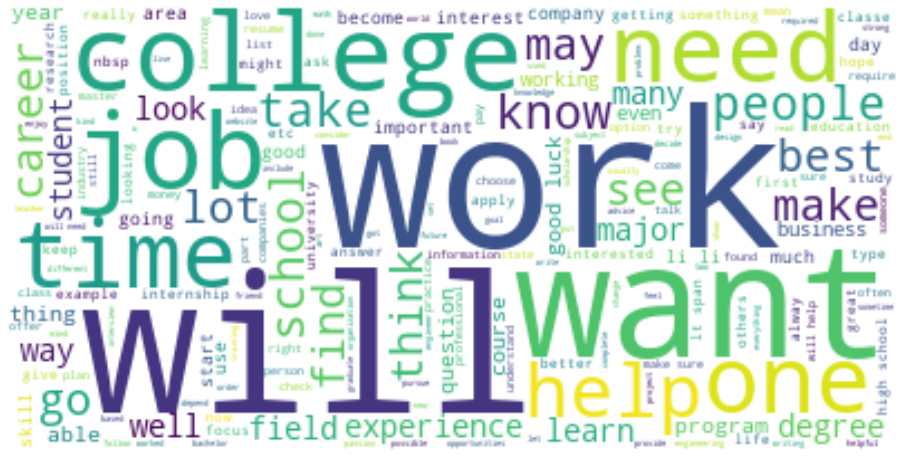

In [342]:
#Answers wordcloud
plot_wordcloud(answers, 'answers_body')

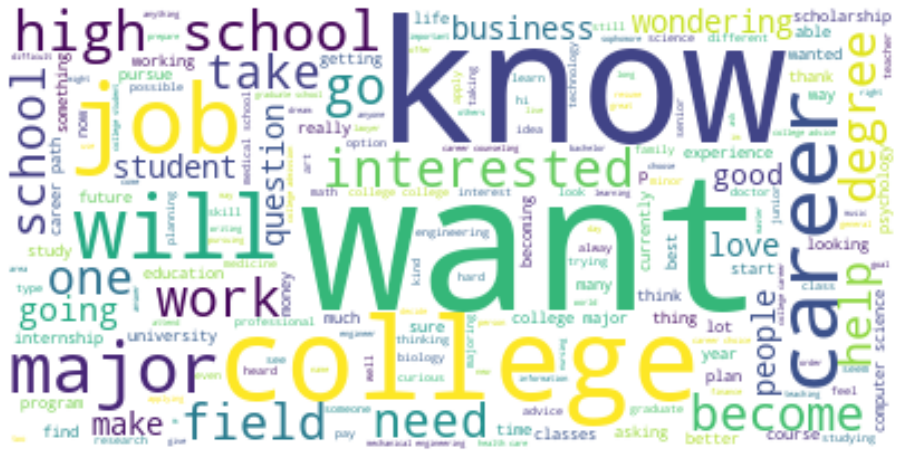

In [332]:
plot_wordcloud(questions, 'questions_body')


# Predicting Industry

In [450]:
que_time = pd.read_csv('clean/questions_TurnaroundTime.csv')

In [451]:
que_time

,X,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,question_score,all_tags,tag_count,emails_sent_count,professionals_notified_count,first_email_sent,last_email_sent,total_answers,first_answer_posted,last_answer_posted,total_comments,first_comment_posted,last_comment_posted,students_location,students_date_joined,answer_time_hrs,twentyfour_hours
0,1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...,1,lecture | college | professor,3,200,200,2016-04-26 11:14:28 UTC+0000,2018-03-25 01:03:06 UTC+0000,1,2016-04-29 19:40:14,2016-04-29 19:40:14 UTC+0000,1,2016-05-09 09:46:12 UTC+0000,2016-05-09 09:46:12 UTC+0000,"Coimbatore, Tamil Nadu, India",2016-04-22 10:07:32 UTC+0000,80.430000,0
1,2,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...,5,military | army,2,62,62,2016-05-20 16:49:19 UTC+0000,2018-04-04 00:33:31 UTC+0000,2,2018-05-01 14:19:08,2018-05-02 02:41:02 UTC+0000,0,NaN,NaN,"Providence, Rhode Island",2016-05-20 16:29:08 UTC+0000,17061.511944,0
2,3,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....,2,overseas | working-abroad,2,5,5,2018-06-01 01:19:31 UTC+0000,2018-12-22 23:32:42 UTC+0000,1,2017-05-10 19:00:47,2017-05-10 19:00:47 UTC+0000,0,NaN,NaN,NaN,2017-02-07 15:51:57 UTC+0000,2183.785833,0
3,4,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...,2,networking | business,2,642,642,2017-10-12 23:06:00 UTC+0000,2019-01-30 00:54:17 UTC+0000,2,2017-10-12 16:01:44,2017-10-13 22:07:33 UTC+0000,0,NaN,NaN,"North Lauderdale, Florida",2017-09-01 14:02:02 UTC+0000,985.936667,0
4,5,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...,2,scholarships | highschoolsenior | college | fi...,4,320,320,2017-09-01 02:37:00 UTC+0000,2019-01-28 02:45:58 UTC+0000,2,2017-09-29 18:50:11,2018-06-08 02:39:02 UTC+0000,0,NaN,NaN,"Tunnel Hill, Georgia",2017-09-01 02:29:06 UTC+0000,688.221389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23926,23927,ce1ff7a035d74721a5b7d21105f9ddb6,c1c6e6a8c9df4c02af52eda6fa0c552f,2016-04-07 01:08:59,What is a computer engineer & a computer progr...,<p>I want to know which one is better to do an...,9,NaN,0,251,251,2016-04-07 01:09:00 UTC+0000,2016-04-08 21:00:23 UTC+0000,7,2016-04-07 01:38:55,2016-05-03 20:06:35 UTC+0000,5,2016-04-07 02:00:46 UTC+0000,NaN,"Manassas, Virginia",2016-03-25 20:28:51 UTC+0000,0.498889,1
23927,23928,7df38c9ded4a4474bb4f9c1f659e1ad1,6ab792d625e14eb2abc14f9a57a450aa,2015-01-26 17:44:44,What major do I need to study to be a writer,I am a high school junior and for awhile now I...,5,famous | journalism | writer | educator | nove...,5,1,1,2015-01-30 21:00:02 UTC+0000,2015-01-30 21:00:02 UTC+0000,2,2015-01-26 21:11:31,2015-02-05 04:30:01 UTC+0000,2,2015-01-28 18:58:21 UTC+0000,NaN,"La Mirada, California",2015-01-26 17:37:23 UTC+0000,3.446389,1
23928,23929,63c89317413046f483020585f0cc8dc4,977428d851b24183b223be0eb8619a8c,2011-11-09 20:42:47,Which careers are good if I enjoy working with...,"I have been volunteering, and I have found tha...",5,children | education,2,0,0,NaN,NaN,6,2011-11-11 19:28:14,2017-05-10 19:12:59 UTC+0000,10,2014-04-30 04:58:39 UTC+0000,NaN,NaN,NaN,46.757500,0
23929,23930,b64ef9cf0d33475ca9c22bdb8749f5a8,82cc74c0e18347e4b68b219e250eb10f,2016-05-28 03:08:07,How can going to college help me advance my ca...,I am thinking about a career in law enforcemen...,4,police | law-enf

In [454]:
pro.columns

Index(['professionals_id', 'professionals_location', 'professionals_industry',
       'professionals_headline', 'professionals_date_joined', 'all_tags',
       'tag_count', 'group_count', 'school_count', 'mean_immediate_emails',
       'mean_immediate_questions', 'mean_daily_emails', 'mean_daily_questions',
       'mean_weekly_emails', 'mean_weekly_questions',
       'total_questions_answered', 'total_answers_posted',
       'total_comment_count', 'cluster', 'Pro_industry_category', 'company'],
      dtype='object')

In [484]:
from sklearn.model_selection import train_test_split

# TODO: make sure to convert target to numpy array as pd.Series does not well fit for the following tasks.
X = pro.drop(columns=['Pro_industry_category','professionals_id', 'professionals_location', 'professionals_industry',
       'professionals_headline', 'professionals_date_joined', 'all_tags','cluster', 'company'])
T = pro['Pro_industry_category'].to_numpy()
X_train, X_test, t_train, t_test = train_test_split(X, T,test_size=0.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (17640, 12)
Train target shape: (17640,)
Test data shape: (4410, 12)
Test target shape: (4410,)


In [485]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train, t_train)

train_score = clf.score(X_train, t_train)
test_score = clf.score(X_test, t_test)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.7971655328798186, Test Accuracy: 0.30634920634920637


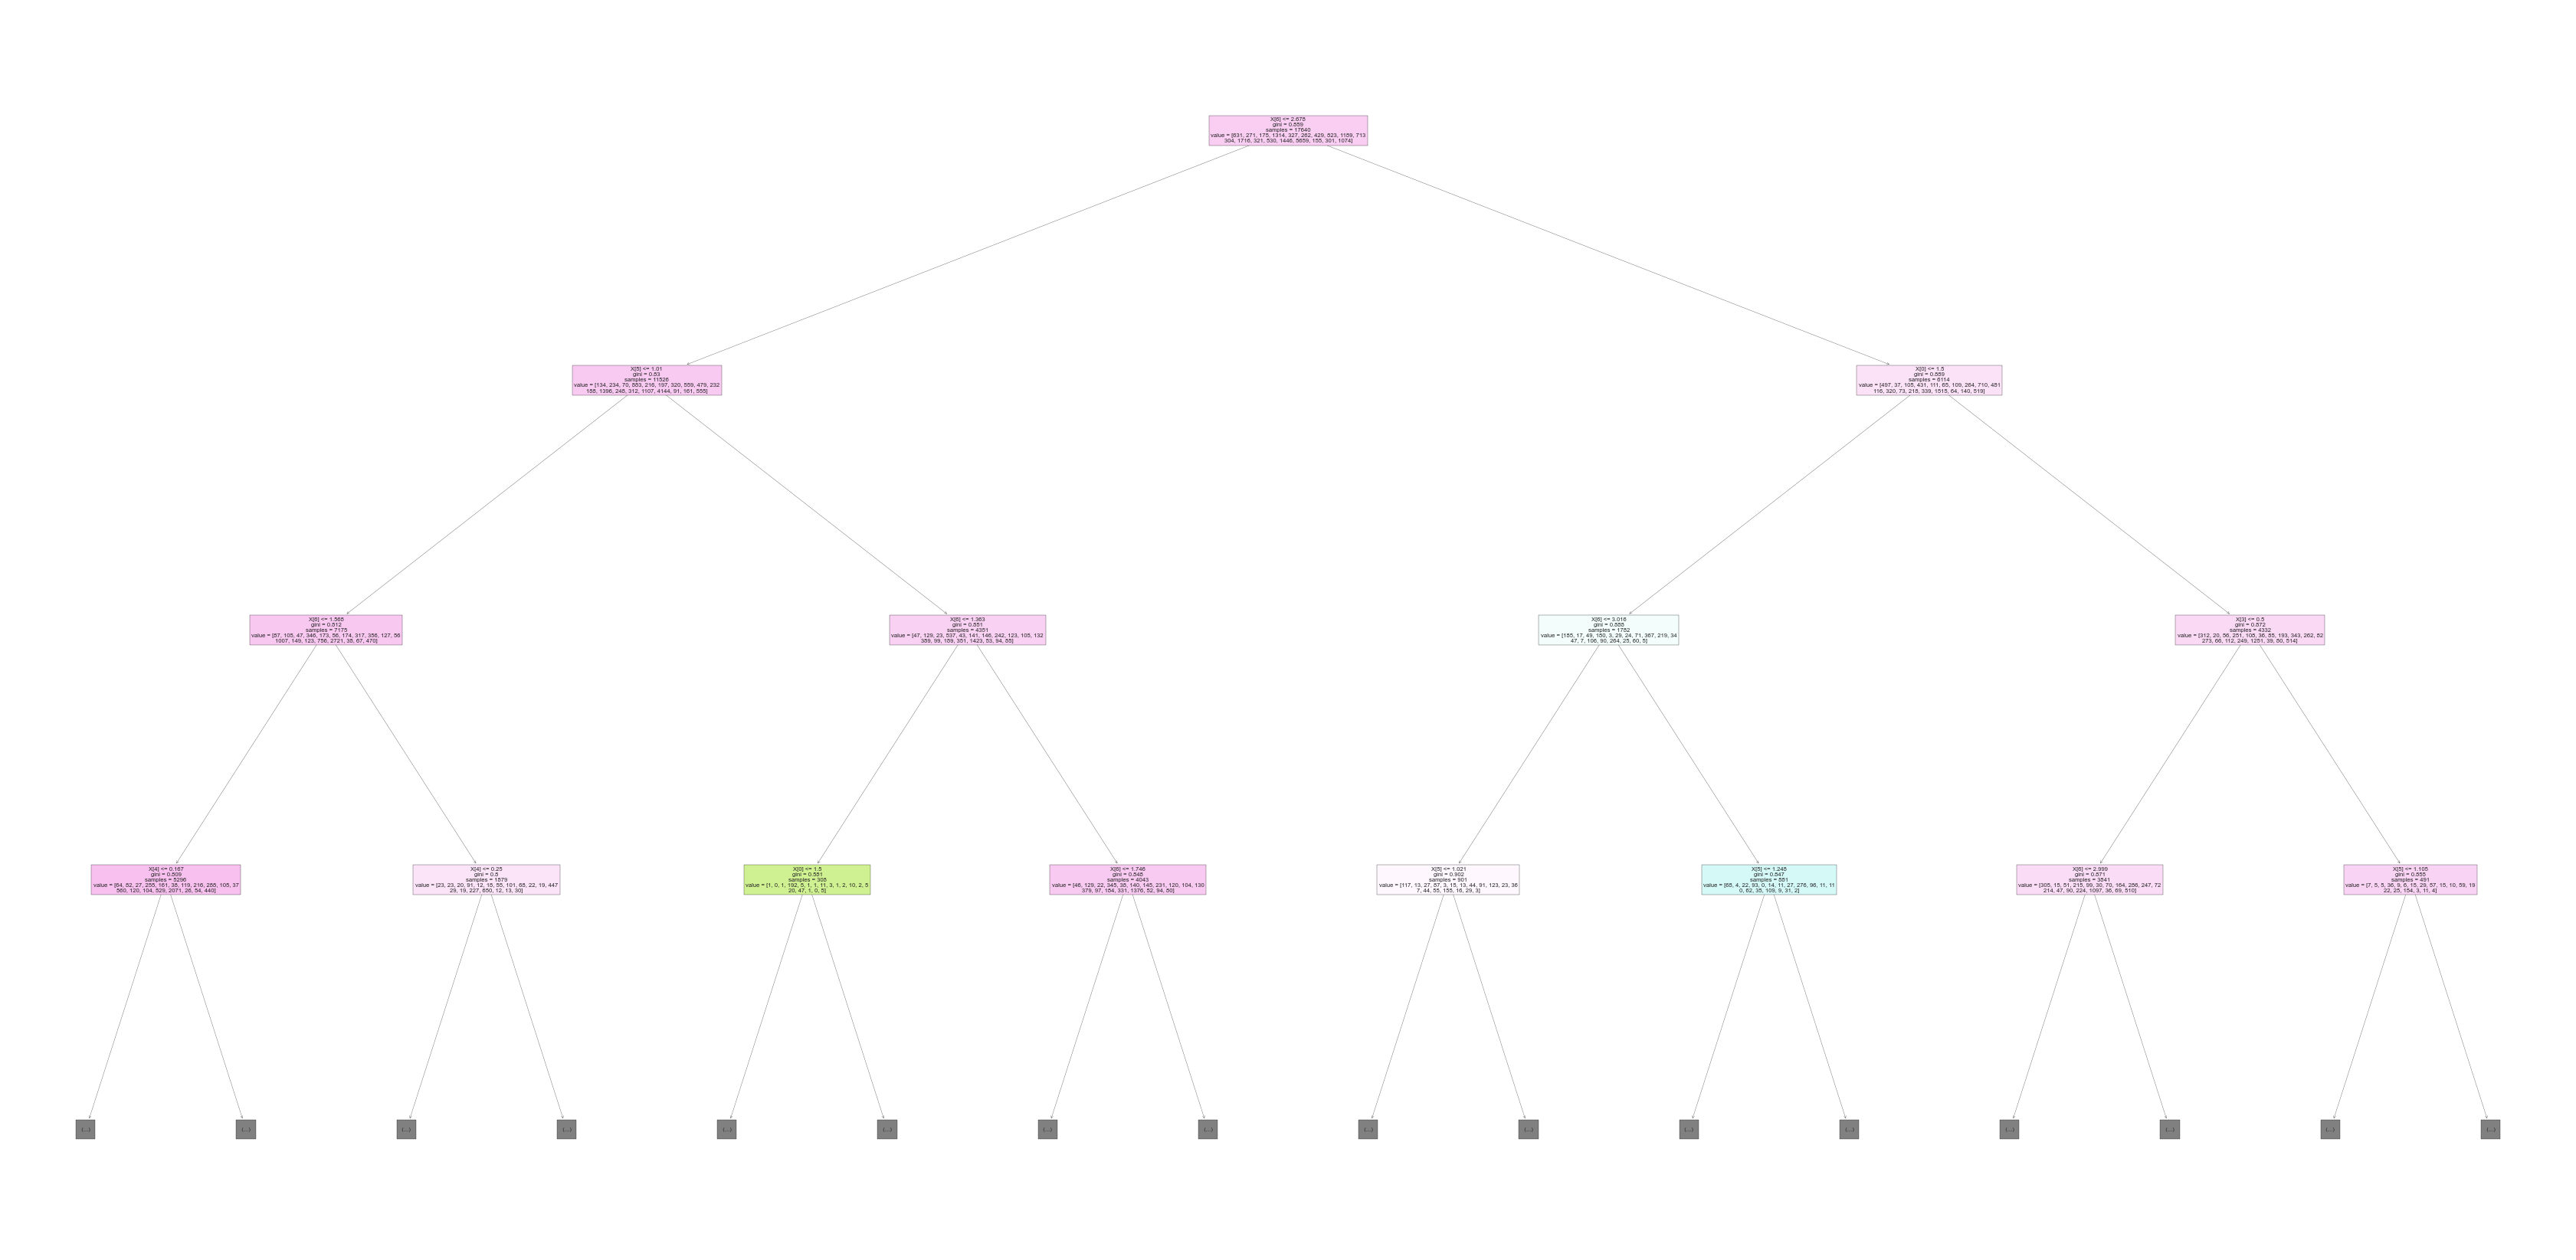

In [481]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
treeplot = plot_tree(clf, filled=True, max_depth=3)